# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [1]:
 # run this cell to Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

You will require the following libraries:


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# Module 1: Importing Data Sets


The functions below will download the dataset into your browser:


In [6]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

You will need to download the dataset; if you are running locally, please comment out the following code: 


Use the Pandas method <b>read_csv()</b> to load the data from the web address.


In [10]:
df = pd.read_csv(file_name, parse_dates=['date'])


We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [9]:
#your code here
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [11]:
#your code here
df.dtypes

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [12]:
#your code here
df.describe()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,0.00000,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,6239.28002,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


# Module 2: Data Wrangling


### Question 2

Drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 using the method <code>drop()</code>, then use the method <code>describe()</code> to obtain a statistical summary of the data <code>True</code>


In [15]:

df = df.drop(['id', 'Unnamed: 0'], axis=1)


In [16]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


Check missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>

In [18]:
missing_value = df.isnull()
missing_value

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
missing_data = df.notnull()
missing_data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [20]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [26]:
# Your code
mean_bed = df["bedrooms"].astype("float").mean(axis=0)
print("mean of bedrooms:", mean_bed)

df["bedrooms"].replace(np.nan, mean_bed, inplace=True)
df.isnull().sum()

mean of bedrooms: 3.372870370370371


date              0
price             0
bedrooms          0
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [28]:
#Your code here
mean_bath = df['bathrooms'].astype('float').mean(axis=0)
print("mean of bedrooms:", mean_bed)

df['bathrooms'].replace(np.nan, mean_bath, inplace=True)
df.isnull().sum()

mean of bedrooms: 3.372870370370371


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

##### Confirm that there is no more missing values in the columns above

In [29]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Module 3: Exploratory Data Analysis


### Question 3

Use the method <code>value_counts</code> to count the number of houses with unique floor values, use the method <code>.to_frame()</code> to convert it to a dataframe.


In [34]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


There are more houses with 3/4 bedrooms in our dataset, is this true? Check below

                  count
no. of bathrooms       
2.0               13861
1.0                3933
3.0                2527
4.0                1201
5.0                  57
6.0                  24
0.0                   4
8.0                   4
7.0                   2


<Axes: xlabel='no. of bathrooms'>

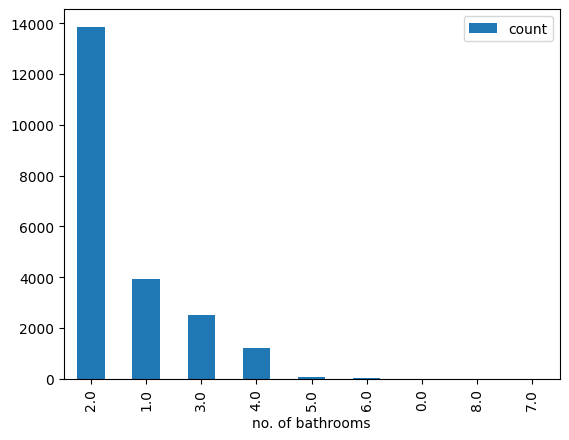

In [35]:
dist = round(df['bathrooms']).value_counts().to_frame().rename(columns = {'bathrooms':'Value_counts'}).rename_axis('no. of bathrooms')
print(dist)
df['bathrooms'] = round(df['bathrooms'])
dist.plot(kind = 'bar')

1/2 bathrooms dominate by counts in our data set, is this true?

In [44]:
#your code here
print('the dataset has 13861 entries with 2 bathrooms and 3933 entries with 1 bathroom, which confirms that 1 and 2 bathrooms dominate by count. The counts for 1 and 2 are the highest, the statement is true')

the dataset has 13861 entries with 2 bathrooms and 3933 entries with 1 bathroom, which confirms that 1 and 2 bathrooms dominate by count. The counts for 1 and 2 are the highest, the statement is true


Majority of the building has 3 condition rating, True od false?

In [47]:
#df['condition'].value_counts().to_frame()
print('True')

True


### Question 4

Use the function <code>boxplot</code> in the matplotlib library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.


<Figure size 1000x600 with 0 Axes>

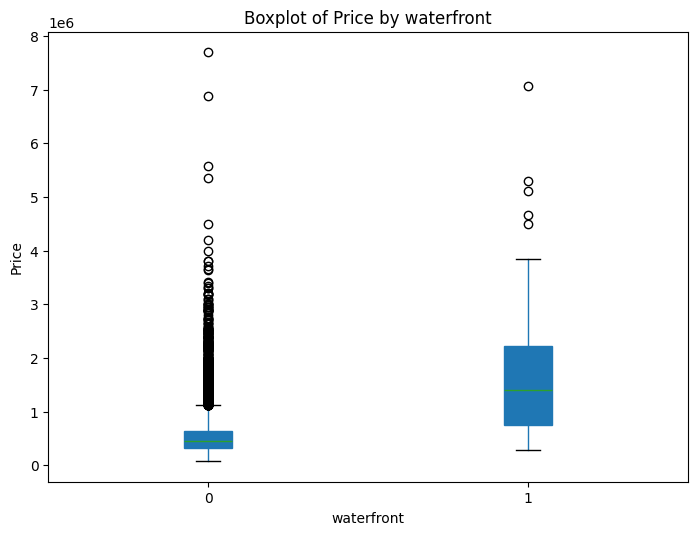

In [65]:
#Your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

df.boxplot(column='price', by='waterfront', grid=False, figsize=(8,6), patch_artist=True)

plt.title('Boxplot of Price by waterfront')
plt.suptitle('') 
plt.xlabel('waterfront')
plt.ylabel('Price')

plt.show()

In [50]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Use same boxplot to check floors

<Figure size 1000x600 with 0 Axes>

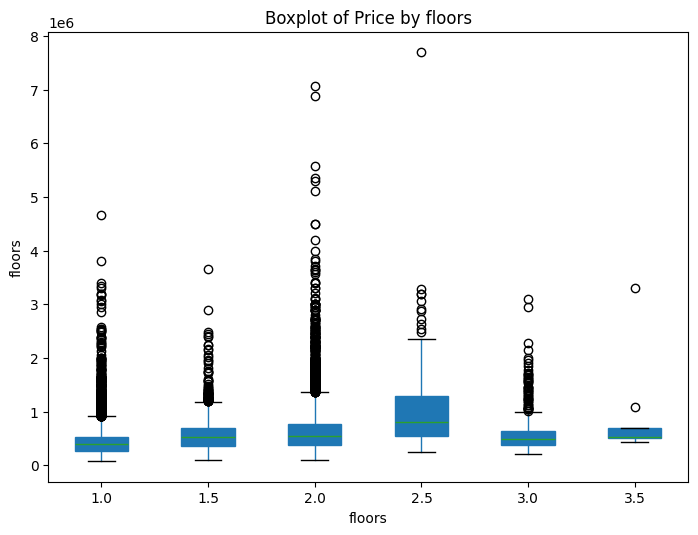

In [64]:
#your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

df.boxplot(column='price', by='floors', grid=False, figsize=(8,6), patch_artist=True)

plt.title('Boxplot of Price by floors')
plt.suptitle('') 
plt.xlabel('floors')
plt.ylabel('floors')

plt.show()

Check bathrooms with boxplot

<Figure size 1000x600 with 0 Axes>

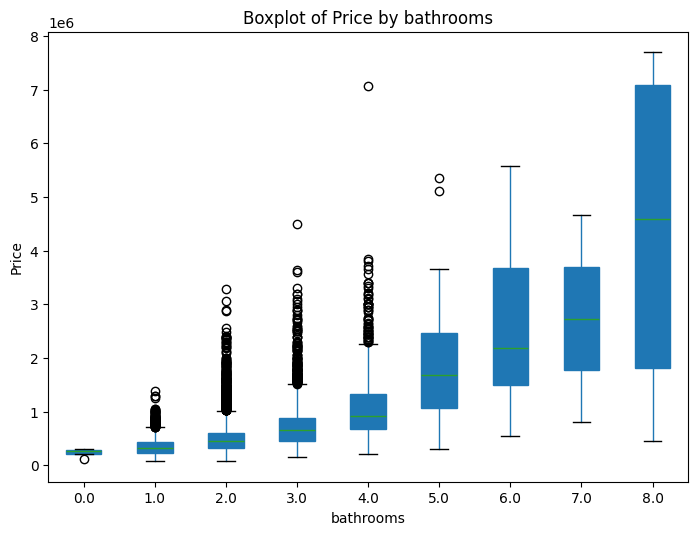

In [66]:
#your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

df.boxplot(column='price', by='bathrooms', grid=False, figsize=(8,6), patch_artist=True)

plt.title('Boxplot of Price by bathrooms')
plt.suptitle('') 
plt.xlabel('bathrooms')
plt.ylabel('Price')

plt.show()

### Question 5

Use the scatter plot with line of best fit matplotlib  to  determine if the feature <code>sqft_above</code> is negatively or positively correlated with price.


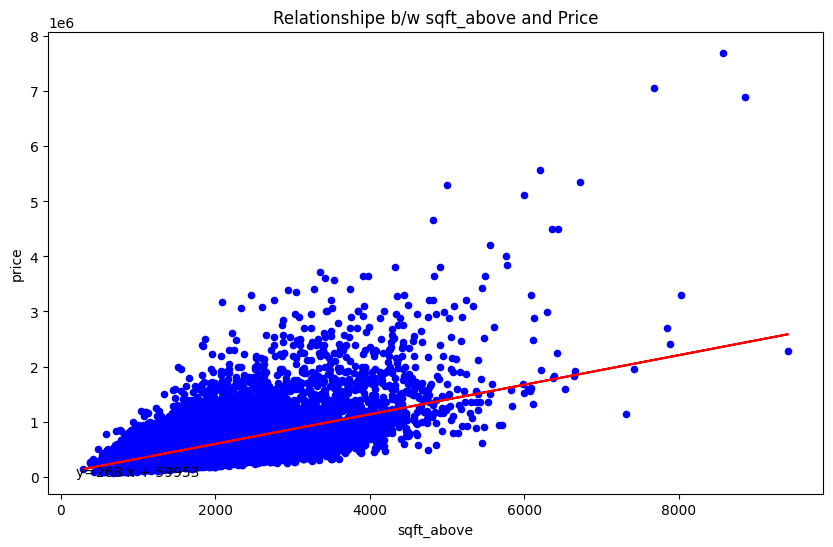

In [70]:
#your code here

plt.figure(figsize=(8, 8))
plt.scatter(df['sqft_above'], df['price'], color='green')

plt.title('Scatterplot of sqft_above vs Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')

x = df['sqft_above']      
y = df['price']    
fit = np.polyfit(x, y, deg=1)

fit

df.plot(kind='scatter', x='sqft_above', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('price')


plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(200, 15000))

plt.show()


In [68]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Check for floor as well

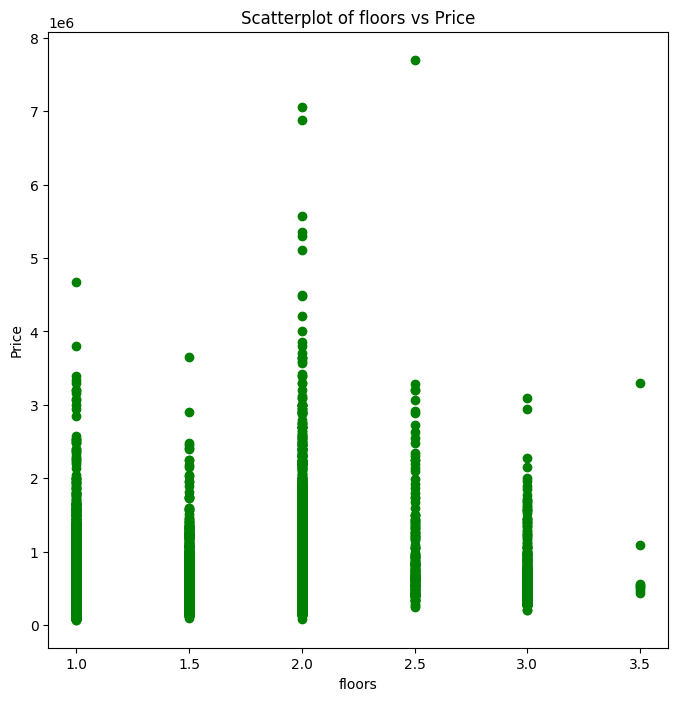

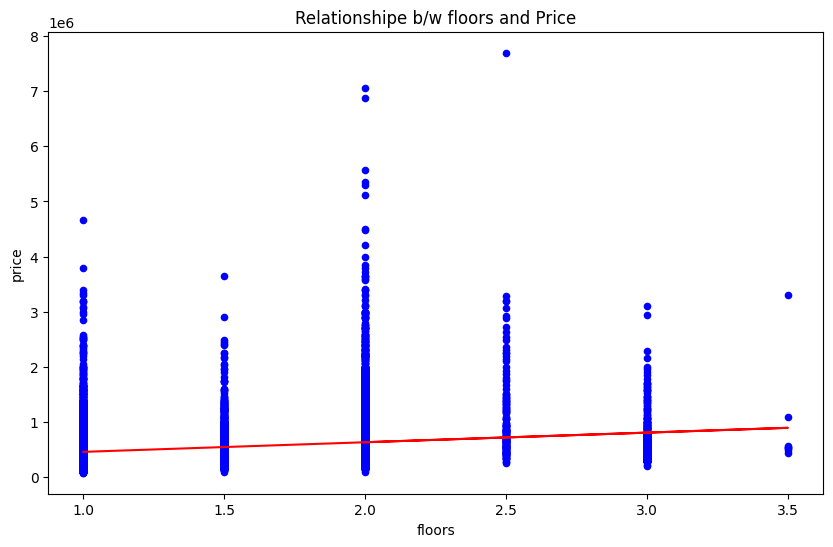

In [74]:
#your code here
plt.figure(figsize=(8, 8))
plt.scatter(df['floors'], df['price'], color='green')

plt.title('Scatterplot of floors vs Price')
plt.xlabel('floors')
plt.ylabel('Price')

x = df['floors']      
y = df['price']    
fit = np.polyfit(x, y, deg=1)

fit

df.plot(kind='scatter', x='floors', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w floors and Price')
plt.xlabel('floors')
plt.ylabel('price')


plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(20, 1000))

plt.show()

Check for bathrooms as well

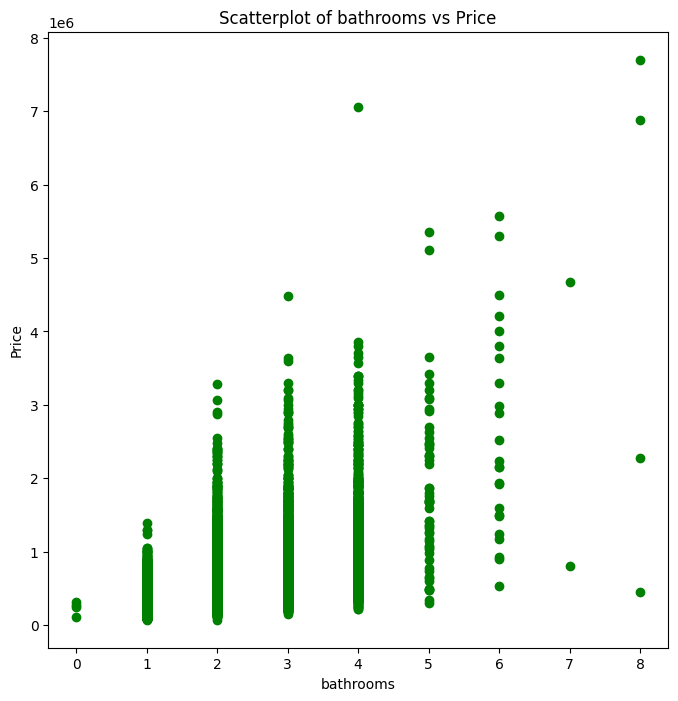

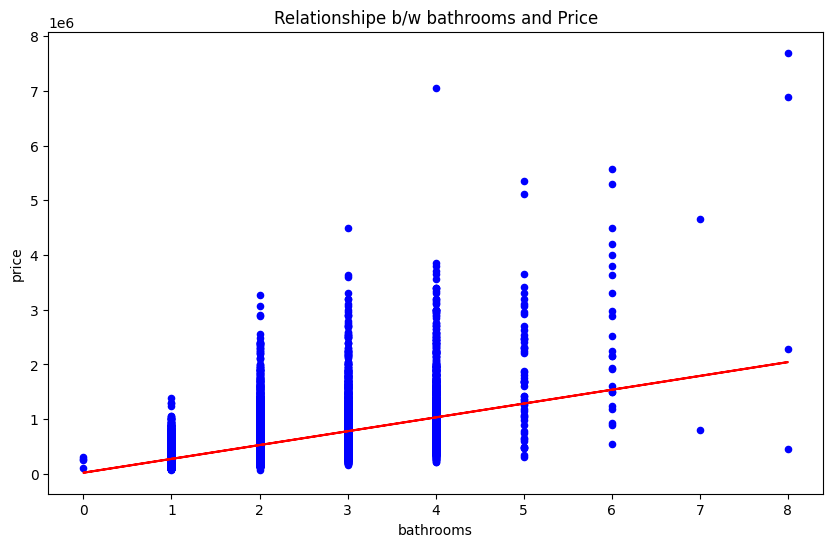

In [75]:
#your code here
plt.figure(figsize=(8, 8))
plt.scatter(df['bathrooms'], df['price'], color='green')

plt.title('Scatterplot of bathrooms vs Price')
plt.xlabel('bathrooms')
plt.ylabel('Price')

x = df['bathrooms']      
y = df['price']    
fit = np.polyfit(x, y, deg=1)

fit

df.plot(kind='scatter', x='bathrooms', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w bathrooms and Price')
plt.xlabel('bathrooms')
plt.ylabel('price')


plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(20, 1000))

plt.show()

#Check for bedrooms

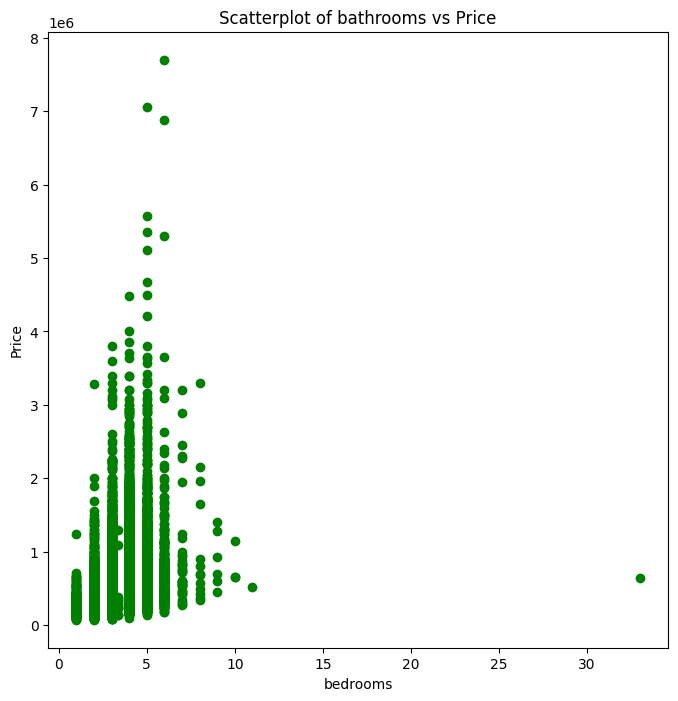

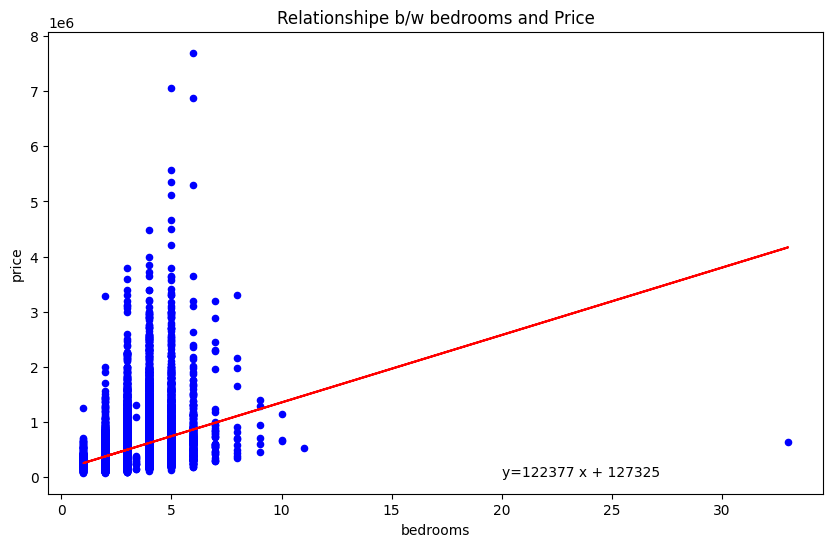

In [77]:
#your code here
plt.figure(figsize=(8, 8))
plt.scatter(df['bedrooms'], df['price'], color='green')

plt.title('Scatterplot of bathrooms vs Price')
plt.xlabel('bedrooms')
plt.ylabel('Price')


x = df['bedrooms']      
y = df['price']    
fit = np.polyfit(x, y, deg=1)

fit

df.plot(kind='scatter', x='bedrooms', y='price', figsize=(10, 6), color='blue')

plt.title('Relationshipe b/w bedrooms and Price')
plt.xlabel('bedrooms')
plt.ylabel('price')


plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(20, 100))

plt.show()

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


Check for sqft_living15

In [84]:
correlation = df['sqft_living'].corr(df['price'])
correlation

np.float64(0.7020350546118002)

Check for sqft_basement

In [83]:
correlation = df['sqft_basement'].corr(df['price'])
correlation

np.float64(0.32381602071198373)

### What did you observe from the analysis?

Tell me here in details


The correlation coefficient between sqft_living and price is 0.7020350546118002 which state that the corr. is strong positive while that of correlation coefficient between sqft_basement and price is 0.32381602071198373  